In [16]:
import tensorflow as tf
from alpha import load_data, plot_images
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [9]:
image_size = 299
N_CHANNELS = 3
input_dims = (None, image_size, image_size, N_CHANNELS)

In [10]:
TRAIN_DIR = "./test"
IMG_SIZE = image_size #If changing, change in alpha.py as well
img_shape = (IMG_SIZE,IMG_SIZE,3)
num = 10
train, label= load_data(num, IMG_SIZE, DIR =TRAIN_DIR)
label_df = pd.DataFrame(label, columns = ['classes'])
label_unique = label_df.classes.unique()
en = LabelEncoder()
en.fit(label_df.classes)
encoded_label = en.transform(label_df.classes)
label_df["encoded_label"] = encoded_label

28it [00:00, 1076.96it/s]
17it [00:00, 575.98it/s]


In [11]:
train.shape, label.shape

((20, 299, 299, 3), (20, 1))

In [12]:
def load_graph(frozen_graph_filename):
    with tf.gfile.GFile(frozen_graph_filename, "rb") as f:
        graph_def = tf.GraphDef()
        graph_def.ParseFromString(f.read())
        
    with tf.Graph().as_default() as graph:
        tf.import_graph_def(graph_def, name="inception")
    return graph

In [13]:
tl = './full_first_try.pb'
graph4 = load_graph(tl)
#for op in graph4.get_operations():
     #print(op.name)

In [14]:
#Get nodes
x = graph4.get_tensor_by_name('inception/inception/ExpandDims:0')
y = graph4.get_tensor_by_name('inception/transfer/prediction:0')

In [52]:
x_train = train[:10]
label_val = np.array(label_df["classes"].iloc[:10]) 

In [54]:
x_train.shape

(10, 299, 299, 3)

In [55]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [56]:
with tf.Session(graph=graph4) as sess:
    y_out = []
    indices = np.arange(10)
    for index in tqdm(range(0, 9, 1)):# 1 is when SGD
        batch = indices[index:index + 1]
        y_out.append(sess.run(y, feed_dict={x:x_train[batch,:,:,:]}))
    #print(y_out)

100%|██████████| 9/9 [00:02<00:00,  3.26it/s]

[array([1]), array([0]), array([1]), array([1]), array([0]), array([0]), array([1]), array([0]), array([1])]


/Users/midhunpk/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


TypeError: Invalid dimensions for image data

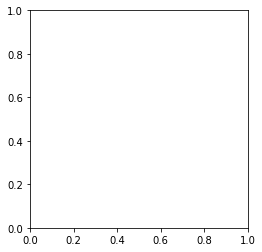

In [57]:
decoded_label_val = en.inverse_transform(y_out)
plt.imshow(np.squeeze(x_train))
plt.xlabel("True: {0}, \n Pred = {1}".format(label_val, decoded_label_val))
plt.show